# 1. Libraries

In [2]:
#pip install pandas numpy matplotlib seaborn scikit-learn jupyter


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 2. EDA

## Dataframes

In [4]:
# Carregar ficheiros CSV da pasta data
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

## Head DF Test

In [5]:
# Mostrar as primeiras 5 linhas
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Head DF Train

In [6]:
# Mostrar as primeiras 5 linhas
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição DF Train

In [7]:
# Dimensão do dataset (linhas, colunas)
print("Dimensão:", train_df.shape)


Dimensão: (891, 12)


In [8]:
# Informações sobre colunas e valores nulos
print("\nInformações gerais:")
print(train_df.info())


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
# Estatísticas descritivas (variáveis numéricas)
print("\nEstatísticas descritivas:")
print(train_df.describe())


Estatísticas descritivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
# Contar valores nulos por coluna
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualização de todas as variavéis

In [13]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Survival

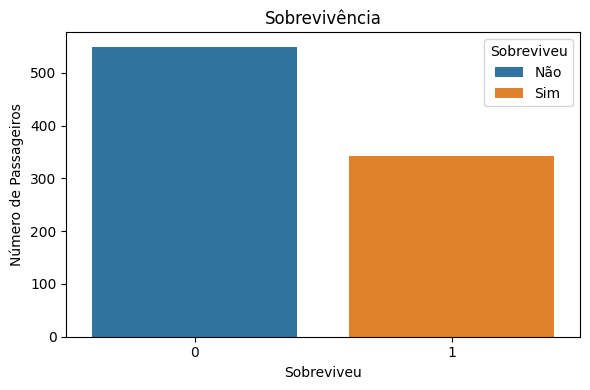

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Survived", hue="Survived")
plt.title("Sobrevivência")
plt.xlabel("Sobreviveu")
plt.ylabel("Número de Passageiros")
plt.legend(title="Sobreviveu", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

# 0 = Não sobreviveu
# 1 = Sobreviveu

### Classe

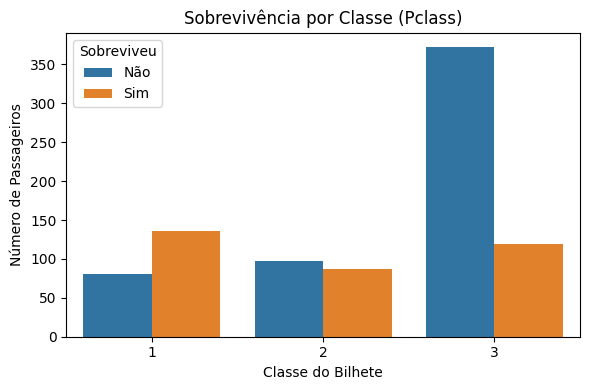

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.title("Sobrevivência por Classe (Pclass)")
plt.xlabel("Classe do Bilhete")
plt.ylabel("Número de Passageiros")
plt.legend(title="Sobreviveu", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

# 1st class = 1
# 2nd class = 2
# 3rd class = 3

### Sexo

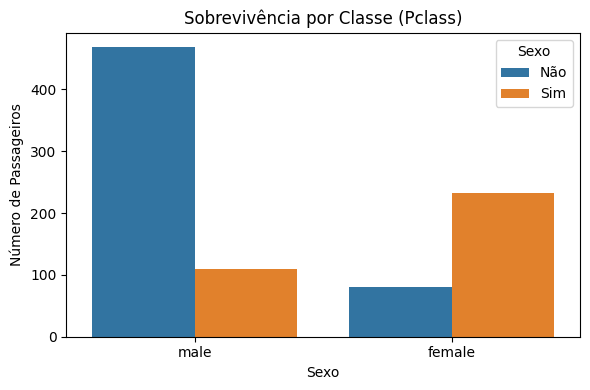

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.title("Sobrevivência por Classe (Pclass)")
plt.xlabel("Sexo")
plt.ylabel("Número de Passageiros")
plt.legend(title="Sexo", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

### Idade

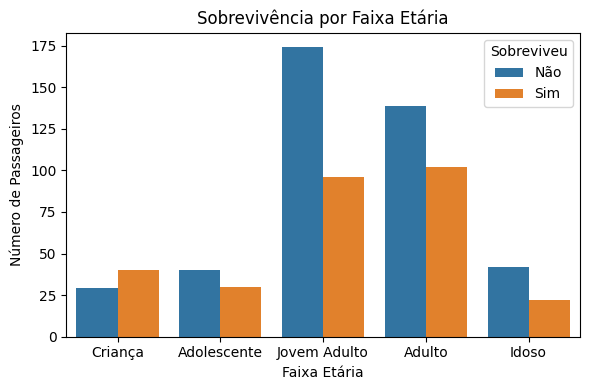

In [25]:
bins = [0, 12, 18, 30, 50, 80]
labels = ['Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="AgeGroup", hue="Survived")
plt.title("Sobrevivência por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Passageiros")
plt.legend(title="Sobreviveu", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

#0 = Criança
#1 = Adolescente   
#2 = Jovem Adulto
#3 = Adulto
#4 = Idoso

### Siblings / Spouses

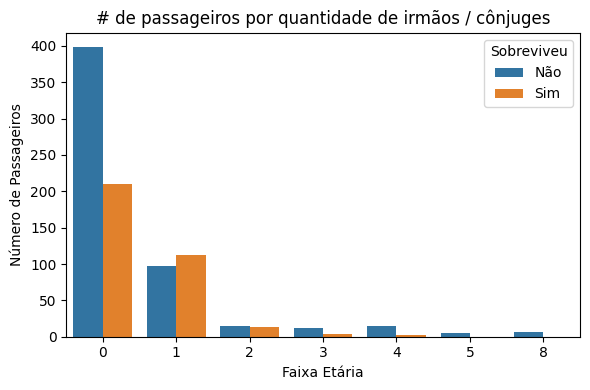

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="SibSp", hue="Survived")
plt.title("# de passageiros por quantidade de irmãos / cônjuges")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Passageiros")
plt.legend(title="Sobreviveu", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

### Parch

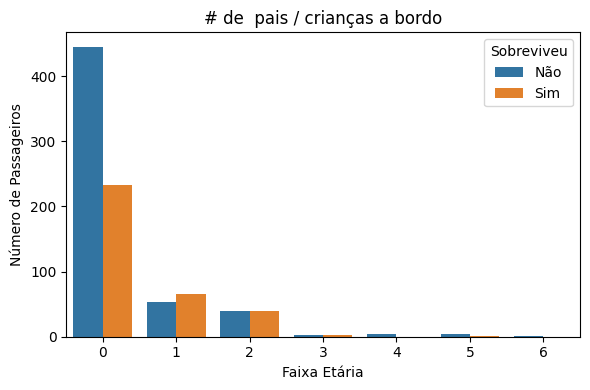

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Parch", hue="Survived")
plt.title("# de  pais / crianças a bordo")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Passageiros")
plt.legend(title="Sobreviveu", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()

### Ticket

Dificil fazer gráficos dado a complexidade dos números dos bilhetes

### Tarifa

C:\Users\drfin\AppData\Local\Temp\ipykernel_67728\4008487097.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_counts = train_df.groupby(['Fare_bin', 'Survived']).size().unstack(fill_value=0)


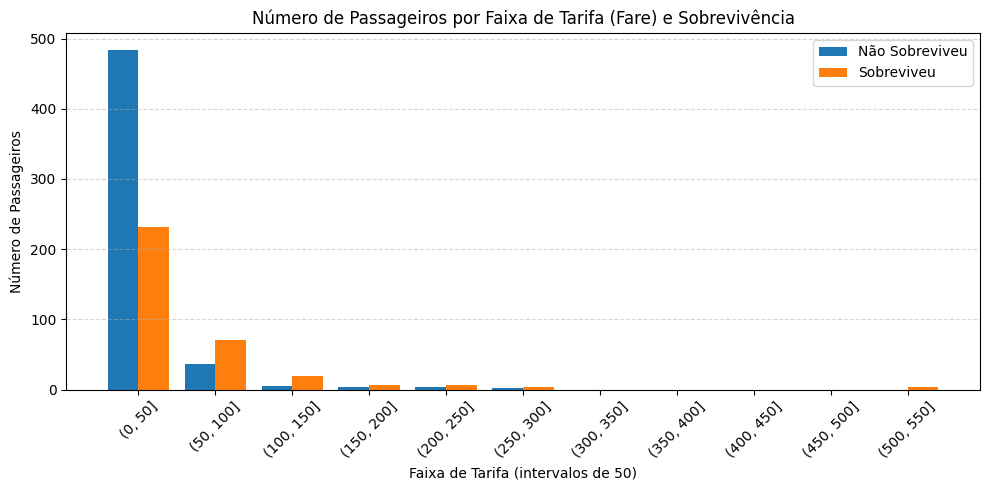

In [47]:
# Criar bins de 0 até o máximo valor de Fare, de 50 em 50
fare_bins = range(0, int(train_df['Fare'].max()) + 50, 50)
train_df['Fare_bin'] = pd.cut(train_df['Fare'], bins=fare_bins)

# Contar número de passageiros por bin e por sobrevivência
fare_counts = train_df.groupby(['Fare_bin', 'Survived']).size().unstack(fill_value=0)

# Preparar o gráfico
x = range(len(fare_counts))
width = 0.4

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], fare_counts[0], width=width, label='Não Sobreviveu')
plt.bar([i + width/2 for i in x], fare_counts[1], width=width, label='Sobreviveu')

# Configurações do gráfico
plt.title('Número de Passageiros por Faixa de Tarifa (Fare) e Sobrevivência')
plt.xlabel('Faixa de Tarifa (intervalos de 50)')
plt.ylabel('Número de Passageiros')
plt.xticks(ticks=x, labels=[str(interval) for interval in fare_counts.index], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Cabine

In [48]:
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [50]:
train_df['Cabin'].isna().sum()

np.int64(687)

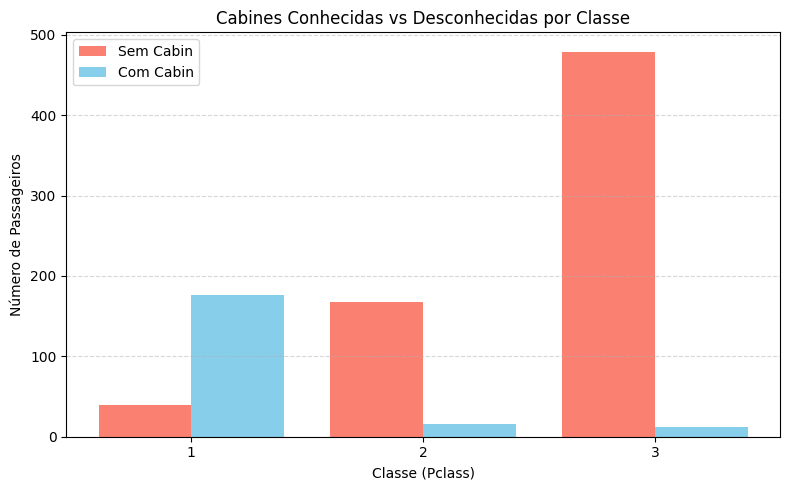

In [51]:
# Criar uma coluna binária: True se Cabin não for nulo, False se for
train_df['Cabin_known'] = train_df['Cabin'].notna()

# Contagem de passageiros por classe e por presença de cabine
cabin_by_class = train_df.groupby(['Pclass', 'Cabin_known']).size().unstack(fill_value=0)

# Dados para o gráfico
x = [1, 2, 3]
width = 0.4

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], cabin_by_class[False], width=width, label='Sem Cabin', color='salmon')
plt.bar([i + width/2 for i in x], cabin_by_class[True], width=width, label='Com Cabin', color='skyblue')

plt.title('Cabines Conhecidas vs Desconhecidas por Classe')
plt.xlabel('Classe (Pclass)')
plt.ylabel('Número de Passageiros')
plt.xticks(ticks=x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Ou seja, 1ª e 2ª classe quase ninguem tenho cabine atribuida

### Embarque

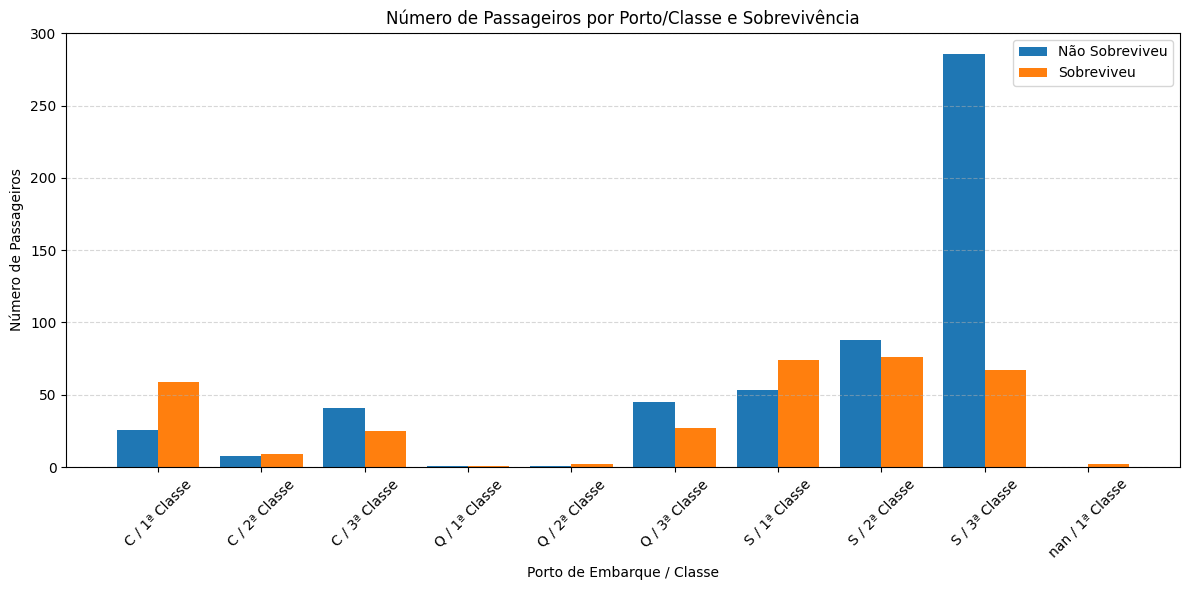

In [54]:
# Traduzir classe para texto (opcional, só para visual)
pclass_map = {1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'}

# Criar coluna combinada: Porto / Classe
train_df['Embarked_Class'] = train_df.apply(lambda row: f"{row['Embarked']} / {pclass_map[row['Pclass']]}", axis=1)

# Contar passageiros por grupo e sobrevivência
group_counts = train_df.groupby(['Embarked_Class', 'Survived']).size().unstack(fill_value=0)

# Preparar dados para gráfico
x = range(len(group_counts))
width = 0.4

plt.figure(figsize=(12,6))
plt.bar([i - width/2 for i in x], group_counts[0], width=width, label='Não Sobreviveu')
plt.bar([i + width/2 for i in x], group_counts[1], width=width, label='Sobreviveu')

# Configurações
plt.title('Número de Passageiros por Porto/Classe e Sobrevivência')
plt.xlabel('Porto de Embarque / Classe')
plt.ylabel('Número de Passageiros')
plt.xticks(ticks=x, labels=group_counts.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# S = Southampton
# C = Cherbourg
# Q = Queenstown

# 3. Data Treatment